<a href="https://colab.research.google.com/github/edwardsun20/cervical-cancer-predictionML/blob/main/cervical_cancer_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import modules
import numpy as np
import pandas as pd
import datetime as dt 
from scipy.stats import sem
from scipy import stats
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn import metrics

from sklearn.model_selection import GridSearchCV
 # Random search beats grid search. You can start with random search and THEN do a grid search on close by values.

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from imblearn.over_sampling import SMOTE
# Also try undersampling


pd.options.display.float_format = '{:.5f}'.format

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
#importing the dataset
from google.colab import files
uploaded = files.upload()

Saving kag_risk_factors_cervical_cancer.csv to kag_risk_factors_cervical_cancer (7).csv


In [ ]:
#reading the imported csv
import io

df_full = pd.read_csv(io.BytesIO(uploaded['kag_risk_factors_cervical_cancer.csv']))

df_full.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0


In [ ]:
#checking dimensions and datatypes
print(df_full.shape)
df_full.info()

(858, 36)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null

In [ ]:
#Renaming column names to improve useability
df_full.columns=['Age', 'No_of_sex_partner', 'First_sexual_intercourse',\
                          'No_pregnancies','Smokes',  'Smokes_yrs',  'Smokes_packs_yr',  'Hormonal_Contraceptives',\
                          'Hormonal_Contraceptives_years','IUD', 'IUD_years', 'STDs', 'STDs_number', 'STDs_condylomatosis',\
                          'STDs_cervical_condylomatosis', 'STDs_vaginal_condylomatosis', 'STDs_vulvo_perineal_condylomatosis',\
                          'STDs_syphilis', 'STDs_pelvic_inflammatory_disease', 'STDs_genital_herpes', 'STDs_molluscum_contagiosum',\
                          'STDs_AIDS', 'STDs_HIV', 'STDs_Hepatitis_B', 'STDs_HPV', 'STDs_No_of_diagnosis', 'STD_Time_since_first_diagnosis',\
                          'STDs_Time_since_last_diagnosis', 'Dx_Cancer', 'Dx_CIN', 'Dx_HPV', 'Dx', 'Hinselmann','Schiller' ,'Citology', 'Biopsy']

In [ ]:
## replace missing values with NaN

df_full = df_full.replace('?', np.nan)
df_full.head()

,Age,No_of_sex_partner,First_sexual_intercourse,No_pregnancies,Smokes,Smokes_yrs,Smokes_packs_yr,Hormonal_Contraceptives,Hormonal_Contraceptives_years,IUD,IUD_years,STDs,STDs_number,STDs_condylomatosis,STDs_cervical_condylomatosis,STDs_vaginal_condylomatosis,STDs_vulvo_perineal_condylomatosis,STDs_syphilis,STDs_pelvic_inflammatory_disease,STDs_genital_herpes,STDs_molluscum_contagiosum,STDs_AIDS,STDs_HIV,STDs_Hepatitis_B,STDs_HPV,STDs_No_of_diagnosis,STD_Time_since_first_diagnosis,STDs_Time_since_last_diagnosis,Dx_Cancer,Dx_CIN,Dx_HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,0


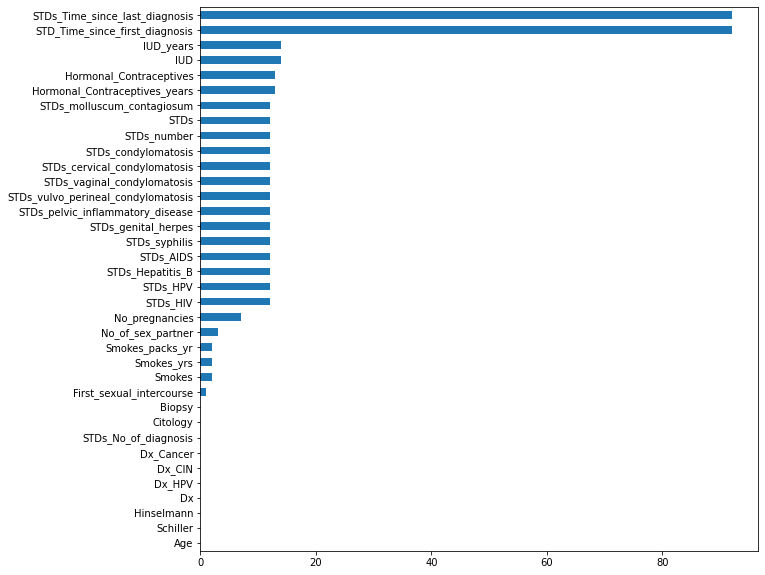

In [ ]:
# Checking percent of missing values for each predictor
plt.figure(figsize=(10,10))
np.round(df_full.isnull().sum()/df_full.shape[0]*100).sort_values().plot(kind='barh')


In [ ]:
# converting numerical predictors as numeric datatypes
predictors=list(df_full.columns)
predictors.remove('Biopsy')

categorical_predictors = ['Smokes','Hormonal_Contraceptives','IUD','STDs','STDs_condylomatosis','STDs_cervical_condylomatosis','STDs_vaginal_condylomatosis',
                          'STDs_vulvo_perineal_condylomatosis','STDs_syphilis','STDs_pelvic_inflammatory_disease','STDs_genital_herpes','STDs_molluscum_contagiosum',
                          'STDs_AIDS','STDs_HIV','STDs_Hepatitis_B','STDs_HPV','Dx_Cancer','Dx_CIN','Dx_HPV','Dx', 'Hinselmann', 'Schiller' ,'Citology']

numeric_predictors = [i for i in predictors if i not in categorical_predictors]

df_full[numeric_predictors] = df_full[numeric_predictors].apply(pd.to_numeric, errors='ignore')

In [ ]:
#checking dimensions and datatypes
print(df_full.shape)
df_full.info()
df_full.head()

(858, 36)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    int64  
 1   No_of_sex_partner                   832 non-null    float64
 2   First_sexual_intercourse            851 non-null    float64
 3   No_pregnancies                      802 non-null    float64
 4   Smokes                              845 non-null    object 
 5   Smokes_yrs                          845 non-null    float64
 6   Smokes_packs_yr                     845 non-null    float64
 7   Hormonal_Contraceptives             750 non-null    object 
 8   Hormonal_Contraceptives_years       750 non-null    float64
 9   IUD                                 741 non-null    object 
 10  IUD_years                           741 non-null    float64
 11  STDs                               

,Age,No_of_sex_partner,First_sexual_intercourse,No_pregnancies,Smokes,Smokes_yrs,Smokes_packs_yr,Hormonal_Contraceptives,Hormonal_Contraceptives_years,IUD,IUD_years,STDs,STDs_number,STDs_condylomatosis,STDs_cervical_condylomatosis,STDs_vaginal_condylomatosis,STDs_vulvo_perineal_condylomatosis,STDs_syphilis,STDs_pelvic_inflammatory_disease,STDs_genital_herpes,STDs_molluscum_contagiosum,STDs_AIDS,STDs_HIV,STDs_Hepatitis_B,STDs_HPV,STDs_No_of_diagnosis,STD_Time_since_first_diagnosis,STDs_Time_since_last_diagnosis,Dx_Cancer,Dx_CIN,Dx_HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.00000,15.00000,1.00000,0.0,0.00000,0.00000,0.0,0.00000,0.0,0.00000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,nan,nan,0,0,0,0,0,0,0,0
1,15,1.00000,14.00000,1.00000,0.0,0.00000,0.00000,0.0,0.00000,0.0,0.00000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,nan,nan,0,0,0,0,0,0,0,0
2,34,1.00000,nan,1.00000,0.0,0.00000,0.00000,0.0,0.00000,0.0,0.00000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,nan,nan,0,0,0,0,0,0,0,0
3,52,5.00000,16.00000,4.00000,1.0,37.00000,37.00000,1.0,3.00000,0.0,0.00000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,nan,nan,1,0,1,0,0,0,0,0
4,46,3.00000,21.00000,4.00000,0.0,0.00000,0.00000,1.0,15.00000,0.0,0.00000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,nan,nan,0,0,0,0,0,0,0,0


In [ ]:
#using LabelEncoder() to transform categorical variables into a format sklearn can use in test and train datasets

encoders = dict()

for col_name in categorical_predictors:
    series = df_full[col_name]
    label_encoder = LabelEncoder()
    df_full[col_name] = pd.Series(
        label_encoder.fit_transform(series[series.notnull()]),
        index=series[series.notnull()].index
    )
    encoders[col_name] = label_encoder


In [ ]:
# input median values for each numeric predictors' missing values

for i in numeric_predictors:
    df_full[i] = df_full[i].fillna(df_full[i].median())


In [ ]:
# create dummy variables for categorical predictors

df_full = pd.get_dummies(df_full, columns=categorical_predictors, drop_first=True)

df_full.head()

,Age,No_of_sex_partner,First_sexual_intercourse,No_pregnancies,Smokes_yrs,Smokes_packs_yr,Hormonal_Contraceptives_years,IUD_years,STDs_number,STDs_No_of_diagnosis,STD_Time_since_first_diagnosis,STDs_Time_since_last_diagnosis,Biopsy,Smokes_1.0,Hormonal_Contraceptives_1.0,IUD_1.0,STDs_1.0,STDs_condylomatosis_1.0,STDs_vaginal_condylomatosis_1.0,STDs_vulvo_perineal_condylomatosis_1.0,STDs_syphilis_1.0,STDs_pelvic_inflammatory_disease_1.0,STDs_genital_herpes_1.0,STDs_molluscum_contagiosum_1.0,STDs_HIV_1.0,STDs_Hepatitis_B_1.0,STDs_HPV_1.0,Dx_Cancer_1,Dx_CIN_1,Dx_HPV_1,Dx_1,Hinselmann_1,Schiller_1,Citology_1
0,18,4.00000,15.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0,4.00000,3.00000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,15,1.00000,14.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0,4.00000,3.00000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,34,1.00000,17.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0,4.00000,3.00000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,52,5.00000,16.00000,4.00000,37.00000,37.00000,3.00000,0.00000,0.00000,0,4.00000,3.00000,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
4,46,3.00000,21.00000,4.00000,0.00000,0.00000,15.00000,0.00000,0.00000,0,4.00000,3.00000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


,Age,No_of_sex_partner,First_sexual_intercourse,No_pregnancies,Smokes_yrs,Smokes_packs_yr,Hormonal_Contraceptives_years,IUD_years,STDs_number,STDs_No_of_diagnosis,STD_Time_since_first_diagnosis,STDs_Time_since_last_diagnosis,Biopsy,Smokes_1.0,Hormonal_Contraceptives_1.0,IUD_1.0,STDs_1.0,STDs_condylomatosis_1.0,STDs_vaginal_condylomatosis_1.0,STDs_vulvo_perineal_condylomatosis_1.0,STDs_syphilis_1.0,STDs_pelvic_inflammatory_disease_1.0,STDs_genital_herpes_1.0,STDs_molluscum_contagiosum_1.0,STDs_HIV_1.0,STDs_Hepatitis_B_1.0,STDs_HPV_1.0,Dx_Cancer_1,Dx_CIN_1,Dx_HPV_1,Dx_1,Hinselmann_1,Schiller_1,Citology_1
0,18,4.00000,15.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0,4.00000,3.00000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,15,1.00000,14.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0,4.00000,3.00000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,34,1.00000,17.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0,4.00000,3.00000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,52,5.00000,16.00000,4.00000,37.00000,37.00000,3.00000,0.00000,0.00000,0,4.00000,3.00000,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
4,46,3.00000,21.00000,4.00000,0.00000,0.00000,15.00000,0.00000,0.00000,0,4.00000,3.00000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


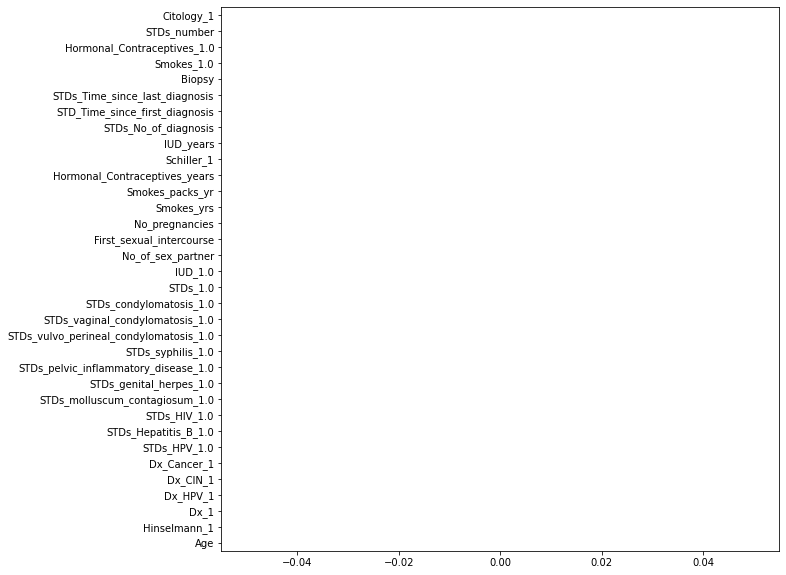

In [ ]:
# Checking percent of missing values for each predictor
plt.figure(figsize=(10,10))
# As you can see here, after imputing the median values for each numeric predictor and dummy variables for each categorical predictor, there are no missing values at all
np.round(df_full.isnull().sum()/df_full.shape[0]*100).sort_values().plot(kind='barh')
df_full.head()

In [ ]:
# Get new list of predictors and keeping numerical predictors as numeric datatypes
predictors=list(df_full.columns)
predictors.remove('Biopsy')

categorical_predictors = ['Smokes_1.0','Hormonal_Contraceptives_1.0','IUD_1.0','STDs_1.0','STDs_condylomatosis_1.0','STDs_vaginal_condylomatosis_1.0',
                          'STDs_vulvo_perineal_condylomatosis_1.0','STDs_syphilis_1.0','STDs_pelvic_inflammatory_disease_1.0','STDs_genital_herpes_1.0','STDs_molluscum_contagiosum_1.0',
                          'STDs_HIV_1.0','STDs_Hepatitis_B_1.0','STDs_HPV_1.0','Dx_Cancer_1','Dx_CIN_1','Dx_HPV_1','Dx_1', 'Hinselmann_1', 'Schiller_1' ,'Citology_1']

numeric_predictors = [i for i in predictors if i not in categorical_predictors]

df_full[numeric_predictors] = df_full[numeric_predictors].apply(pd.to_numeric, errors='ignore')

In [ ]:
#Summary Statistics
# 2X2 tables and chi squared tests for categorical variables
outcome = df_full.loc[:, 'Biopsy']

for col_name in categorical_predictors:
  col_name = df_full.loc[:, col_name]
  col_name_ct = pd.crosstab(col_name.fillna('missing'), outcome)
  print(col_name_ct)
  print(stats.chi2_contingency(col_name_ct))

#summary statistics for all variables
print(df_full.describe(include='all'))

Biopsy        0   1
Smokes_1.0         
0           690  45
1           113  10
(0.4128032074841294, 0.5205501261610987, 1, array([[687.88461538,  47.11538462],
       [115.11538462,   7.88461538]]))
Biopsy                         0   1
Hormonal_Contraceptives_1.0         
0                            358  19
1                            445  36
(1.7175554392370658, 0.19000801793527922, 1, array([[352.83333333,  24.16666667],
       [450.16666667,  30.83333333]]))
Biopsy     0   1
IUD_1.0         
0        729  46
1         74   9
(2.247594652582935, 0.1338222729371177, 1, array([[725.32051282,  49.67948718],
       [ 77.67948718,   5.32051282]]))
Biopsy      0   1
STDs_1.0         
0         736  43
1          67  12
(9.625810524356968, 0.0019186175908358102, 1, array([[729.06410256,  49.93589744],
       [ 73.93589744,   5.06410256]]))
Biopsy                     0   1
STDs_condylomatosis_1.0         
0                        766  48
1                         37   7
(5.406063410857931

In [ ]:
# provide independent t-test using scipy for continuous variables. Then determine mean and standard deviation

for col_name in numeric_predictors:
  w_biopsy = df_full.loc[df_full.Biopsy == 1, col_name]
  
  wo_biopsy = df_full.loc[df_full.Biopsy == 0, col_name]

  print(stats.ttest_ind(w_biopsy.dropna(), wo_biopsy.dropna()), str(col_name), "t-test")
  print(str(col_name), "with biopsy", w_biopsy.mean(skipna=True), "mean", w_biopsy.std(skipna=True), "std")
  print(str(col_name), "without biopsy", wo_biopsy.mean(skipna=True), "mean", wo_biopsy.std(skipna=True), "std \n",)

Ttest_indResult(statistic=1.6396861910271414, pvalue=0.10143784847300615) Age t-test
Age with biopsy 28.636363636363637 mean 8.884784405903948 std
Age without biopsy 26.696139476961395 mean 8.462316204892984 std 

Ttest_indResult(statistic=-0.011943920213552566, pvalue=0.9904731400931277) No_of_sex_partner t-test
No_of_sex_partner with biopsy 2.5090909090909093 mean 1.2747218617862586 std
No_of_sex_partner without biopsy 2.511830635118306 mean 1.667736085859444 std 

Ttest_indResult(statistic=0.21237759889798477, pvalue=0.8318630215490788) First_sexual_intercourse t-test
First_sexual_intercourse with biopsy 17.072727272727274 mean 2.5952559672127795 std
First_sexual_intercourse without biopsy 16.990037359900374 mean 2.8062808738154086 std 

Ttest_indResult(statistic=1.177544145145654, pvalue=0.239305676444277) No_pregnancies t-test
No_pregnancies with biopsy 2.4727272727272727 mean 1.2450575690177346 std
No_pregnancies without biopsy 2.2428393524283936 mean 1.410526124527879 std 

Ttes

Now that we finished data cleaning missing values (imputing the numerical predictors and setting dummy variables for the categorical predictors), we can begin to do a training/test split. 

df_full now has 33 predictors (34 columns if you include the outcome biopsy) and 858 rows.

In [ ]:
df_full

,Age,No_of_sex_partner,First_sexual_intercourse,No_pregnancies,Smokes_yrs,Smokes_packs_yr,Hormonal_Contraceptives_years,IUD_years,STDs_number,STDs_No_of_diagnosis,STD_Time_since_first_diagnosis,STDs_Time_since_last_diagnosis,Biopsy,Smokes_1.0,Hormonal_Contraceptives_1.0,IUD_1.0,STDs_1.0,STDs_condylomatosis_1.0,STDs_vaginal_condylomatosis_1.0,STDs_vulvo_perineal_condylomatosis_1.0,STDs_syphilis_1.0,STDs_pelvic_inflammatory_disease_1.0,STDs_genital_herpes_1.0,STDs_molluscum_contagiosum_1.0,STDs_HIV_1.0,STDs_Hepatitis_B_1.0,STDs_HPV_1.0,Dx_Cancer_1,Dx_CIN_1,Dx_HPV_1,Dx_1,Hinselmann_1,Schiller_1,Citology_1
0,18,4.00000,15.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0,4.00000,3.00000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,15,1.00000,14.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0,4.00000,3.00000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,34,1.00000,17.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0,4.00000,3.00000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,52,5.00000,16.00000,4.00000,37.00000,37.00000,3.00000,0.00000,0.00000,0,4.00000,3.00000,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
4,46,3.00000,21.00000,4.00000,0.00000,0.00000,15.00000,0.00000,0.00000,0,4.00000,3.00000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.00000,18.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0,4.00000,3.00000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
854,32,2.00000,19.00000,1.00000,0.00000,0.00000,8.00000,0.00000,0.00000,0,4.00000,3.00000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
855,25,2.00000,17.00000,0.00000,0.00000,0.00000,0.08000,0.00000,0.00000,0,4.00000,3.00000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
856,33,2.00000,24.00000,2.00000,0.00000,0.00000,0.08000,0.00000,0.00000,0,4.00000,3.00000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Creating a randomly split 70% train and 30% test dataset using train_test_split()
x = df_full.loc[:, df_full.columns != 'Biopsy']
y = df_full.loc[:, 'Biopsy']

print(x.shape)
print(y.shape)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

y_test

(858, 33)
(858,)
(600, 33)
(258, 33)
(600,)
(258,)


713    0
604    0
120    0
208    0
380    0
      ..
485    0
405    0
239    0
135    0
164    0
Name: Biopsy, Length: 258, dtype: int64

In [ ]:
# Naive Model: This model utilizes only the patient's age, whether they smoke, whether they've been diagnosed with a STD, and their number of sexual partners to predict biopsy in a logistic regression framework
# Developing the x and y subsets of the train and test datasets used to fit and test the model
x_Naive_train = x_train.loc[:, ['STDs_1.0', 'Smokes_1.0', 'Age', 'No_of_sex_partner', 'Dx_HPV_1']]
x_Naive_test = x_test.loc[:, ['STDs_1.0', 'Smokes_1.0', 'Age', 'No_of_sex_partner', 'Dx_HPV_1']]

In [ ]:
# fitting the Naive Logistic Regression Model on the train dataset
Naivelogreg_model = LogisticRegression(penalty='none', max_iter = 10000)
Naivelogreg_model.fit(x_Naive_train, y_train)
print(Naivelogreg_model)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [ ]:
#calculating ROC and AUC of the Naive Logistic Regression Model on the test dataset
Naiveproba_outcome = Naivelogreg_model.predict_proba(x_Naive_test)
print(roc_auc_score(y_test, Naiveproba_outcome[:,1]))

0.5842249657064472


In [ ]:
# Using bootstraping to get AUC confidence intervals

y_true = np.array(y_test)
y_pred = np.array(Naiveproba_outcome[:,1])

n_bootstraps = 1000
rng_seed = 42  # control reproducibility
bootstrapped_scores = []

rng = np.random.RandomState(rng_seed)
for i in range(n_bootstraps):
    indices = rng.randint(0, len(y_pred), len(y_pred))
    if len(np.unique(y_true[indices])) < 2:
        continue

    score = roc_auc_score(y_true[indices], y_pred[indices])
    bootstrapped_scores.append(score)
    
sorted_scores = np.array(bootstrapped_scores)
sorted_scores.sort()

confidence_lower = sorted_scores[int(0.05 * len(sorted_scores))]
confidence_upper = sorted_scores[int(0.95 * len(sorted_scores))]
print("Confidence interval for the score: [{:0.3f} - {:0.3}]".format(confidence_lower, confidence_upper))

Confidence interval for the score: [0.436 - 0.728]


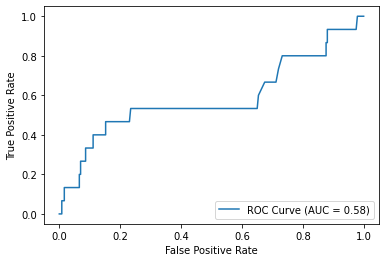

In [ ]:
#Create ROC Curve
fpr, tpr, thresholds = metrics.roc_curve(y_true, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC Curve')
display.plot()  
plt.show()     

In [ ]:
# Logistic Regression model: This model utilizes all predictors to predict biopsy
# fitting the Logistic Regression Model on the train dataset

logreg_model = LogisticRegression(penalty='none', max_iter = 10000)
logreg_model.fit(x_train, y_train)
print(logreg_model)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [ ]:
#calculating ROC and AUC of the Logistic Regression Model on the test dataset
proba_outcome = logreg_model.predict_proba(x_test)
print(roc_auc_score(y_test, proba_outcome[:,1]))

0.8801097393689986


In [ ]:
# Using bootstraping to get AUC confidence intervals

y_true = np.array(y_test)
y_pred = np.array(proba_outcome[:,1])

n_bootstraps = 1000
rng_seed = 42  # control reproducibility
bootstrapped_scores = []

rng = np.random.RandomState(rng_seed)
for i in range(n_bootstraps):
    indices = rng.randint(0, len(y_pred), len(y_pred))
    if len(np.unique(y_true[indices])) < 2:
        continue

    score = roc_auc_score(y_true[indices], y_pred[indices])
    bootstrapped_scores.append(score)
    
sorted_scores = np.array(bootstrapped_scores)
sorted_scores.sort()

confidence_lower = sorted_scores[int(0.05 * len(sorted_scores))]
confidence_upper = sorted_scores[int(0.95 * len(sorted_scores))]
print("Confidence interval for the score: [{:0.3f} - {:0.3}]".format(confidence_lower, confidence_upper))

Confidence interval for the score: [0.755 - 0.979]


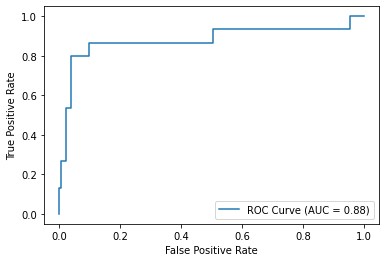

In [ ]:
#Create ROC Curve
fpr, tpr, thresholds = metrics.roc_curve(y_true, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC Curve')
display.plot()  
plt.show()   

In [ ]:
# Ridge Regression model: This model utilizes all predictors to predict biopsy in a logistic regression framework with regularization on the L2 term.
# A 5 fold cross validation was used to build the parameters for the model.
# fitting the Logistic Regression Model on the train dataset
ridge_model = LogisticRegressionCV(cv=5, penalty='l2', max_iter = 10000)
ridge_model.fit(x_train, y_train)
print(ridge_model)

LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=10000, multi_class='auto', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)


In [ ]:
#calculating ROC and AUC of the Logistic Regression Model on the test dataset
ridgeproba_outcome = ridge_model.predict_proba(x_test)
print(roc_auc_score(y_test, ridgeproba_outcome[:,1]))

0.8801097393689986


In [ ]:
# Using bootstraping to get AUC confidence intervals

y_true = np.array(y_test)
y_pred = np.array(ridgeproba_outcome[:,1])

n_bootstraps = 1000
rng_seed = 42  # control reproducibility
bootstrapped_scores = []

rng = np.random.RandomState(rng_seed)
for i in range(n_bootstraps):
    indices = rng.randint(0, len(y_pred), len(y_pred))
    if len(np.unique(y_true[indices])) < 2:
        continue

    score = roc_auc_score(y_true[indices], y_pred[indices])
    bootstrapped_scores.append(score)
    
sorted_scores = np.array(bootstrapped_scores)
sorted_scores.sort()

confidence_lower = sorted_scores[int(0.05 * len(sorted_scores))]
confidence_upper = sorted_scores[int(0.95 * len(sorted_scores))]
print("Confidence interval for the score: [{:0.3f} - {:0.3}]".format(confidence_lower, confidence_upper))

Confidence interval for the score: [0.754 - 0.979]


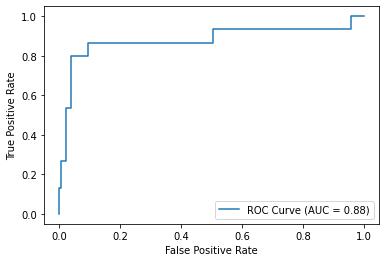

In [ ]:
#Create ROC Curve
fpr, tpr, thresholds = metrics.roc_curve(y_true, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC Curve')
display.plot()  
plt.show()   

In [ ]:
## Random Forest
param_grid = {'n_estimators': [500, 750, 1000, 1250, 1500, 1750, 2000], 'max_features': [2,4,6,8,10], 'random_state': [21]}

rf = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rf, param_grid=param_grid, cv=5)

rf_model = grid_search.fit(x_train, y_train)
best_grid = grid_search.best_estimator_

print(rf_model)
print(grid_search.best_params_, grid_search.best_score_)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
#calculating ROC and AUC of the Logistic Regression Model on the test dataset
rf_proba_outcome = best_grid.predict_proba(x_test)
print(roc_auc_score(y_test, rf_proba_outcome[:,1]))


# Also get the ROC for Train just to show that you're not overfitting as RF tends to overfit.

# Feature importance

# Visual decision tree

0.9700960219478738


In [ ]:
# Using bootstraping to get AUC confidence intervals

y_true = np.array(y_test)
y_pred = np.array(rf_proba_outcome[:,1])

n_bootstraps = 1000
rng_seed = 42  # control reproducibility
bootstrapped_scores = []

rng = np.random.RandomState(rng_seed)
for i in range(n_bootstraps):
    indices = rng.randint(0, len(y_pred), len(y_pred))
    if len(np.unique(y_true[indices])) < 2:
        continue

    score = roc_auc_score(y_true[indices], y_pred[indices])
    bootstrapped_scores.append(score)
    
sorted_scores = np.array(bootstrapped_scores)
sorted_scores.sort()

confidence_lower = sorted_scores[int(0.05 * len(sorted_scores))]
confidence_upper = sorted_scores[int(0.95 * len(sorted_scores))]
print("Confidence interval for the score: [{:0.3f} - {:0.3}]".format(confidence_lower, confidence_upper))

Confidence interval for the score: [0.949 - 0.988]


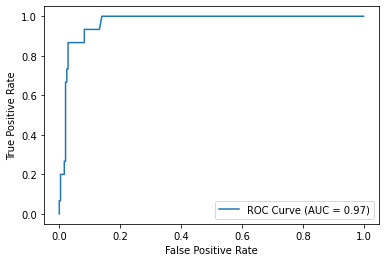

In [ ]:
#Create ROC Curve
fpr, tpr, thresholds = metrics.roc_curve(y_true, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC Curve')
display.plot()  
plt.show()   

Age Score: 0.10001
No_of_sex_partner Score: 0.05095
First_sexual_intercourse Score: 0.07834
No_pregnancies Score: 0.04559
Smokes_yrs Score: 0.01144
Smokes_packs_yr Score: 0.01069
Hormonal_Contraceptives_years Score: 0.05833
IUD_years Score: 0.01621
STDs_number Score: 0.00776
STDs_No_of_diagnosis Score: 0.00521
STD_Time_since_first_diagnosis Score: 0.00915
STDs_Time_since_last_diagnosis Score: 0.00831
Smokes_1.0 Score: 0.00589
Hormonal_Contraceptives_1.0 Score: 0.01528
IUD_1.0 Score: 0.00923
STDs_1.0 Score: 0.00435
STDs_condylomatosis_1.0 Score: 0.00405
STDs_vaginal_condylomatosis_1.0 Score: 0.00033
STDs_vulvo_perineal_condylomatosis_1.0 Score: 0.00421
STDs_syphilis_1.0 Score: 0.00222
STDs_pelvic_inflammatory_disease_1.0 Score: 0.00000
STDs_genital_herpes_1.0 Score: 0.01394
STDs_molluscum_contagiosum_1.0 Score: 0.00003
STDs_HIV_1.0 Score: 0.00389
STDs_Hepatitis_B_1.0 Score: 0.00000
STDs_HPV_1.0 Score: 0.00004
Dx_Cancer_1 Score: 0.00811
Dx_CIN_1 Score: 0.01663
Dx_HPV_1 Score: 0.00811
Dx_

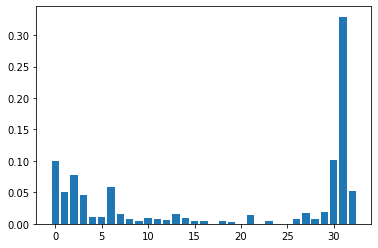

Sorted Variable Importance:
Schiller_1 Score: 0.32939
Hinselmann_1 Score: 0.10167
Age Score: 0.10001
First_sexual_intercourse Score: 0.07834
Hormonal_Contraceptives_years Score: 0.05833
Citology_1 Score: 0.05170
No_of_sex_partner Score: 0.05095
No_pregnancies Score: 0.04559
Dx_1 Score: 0.01895
Dx_CIN_1 Score: 0.01663
IUD_years Score: 0.01621
Hormonal_Contraceptives_1.0 Score: 0.01528
STDs_genital_herpes_1.0 Score: 0.01394
Smokes_yrs Score: 0.01144
Smokes_packs_yr Score: 0.01069
IUD_1.0 Score: 0.00923
STD_Time_since_first_diagnosis Score: 0.00915
STDs_Time_since_last_diagnosis Score: 0.00831
Dx_HPV_1 Score: 0.00811
Dx_Cancer_1 Score: 0.00811
STDs_number Score: 0.00776
Smokes_1.0 Score: 0.00589
STDs_No_of_diagnosis Score: 0.00521
STDs_1.0 Score: 0.00435
STDs_vulvo_perineal_condylomatosis_1.0 Score: 0.00421
STDs_condylomatosis_1.0 Score: 0.00405
STDs_HIV_1.0 Score: 0.00389
STDs_syphilis_1.0 Score: 0.00222
STDs_vaginal_condylomatosis_1.0 Score: 0.00033
STDs_HPV_1.0 Score: 0.00004
STDs_moll

In [ ]:
# get importance for Random forest model
importance = best_grid.feature_importances_
# summarize feature importance
feat_importance = list(zip(x_train.columns, importance))
for i,v in feat_importance:
	print(i, 'Score: %.5f' % v)
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

#Sorted variable importance
sorted_feat_importance = sorted(feat_importance, key = lambda x: x[1], reverse=True)
print("Sorted Variable Importance:")
for i,v in sorted_feat_importance:
	print(i, 'Score: %.5f' % v)
 

 # Change graph to after you sort the values

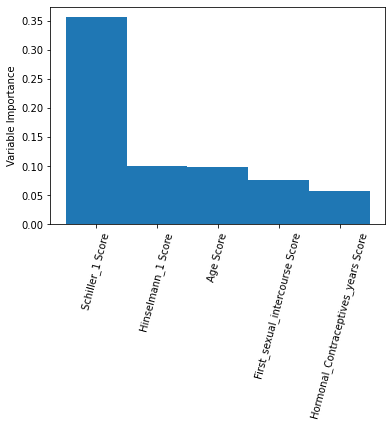

In [ ]:
## Make a bar plot for variable importance

import numpy as np                                                               
import matplotlib.pyplot as plt

top = [('Schiller_1 Score',0.35640),('Hinselmann_1 Score',0.10020),('Age Score',0.09820),('First_sexual_intercourse Score', 0.07667),('Hormonal_Contraceptives_years Score', 0.05768)]
labels, ys = zip(*top)
xs = np.arange(len(labels));
width = 1
plt.bar(xs, ys, width, align='center')
plt.ylabel("Variable Importance")
plt.xticks(xs, labels, rotation = 75);
plt.savefig('varimp.png')

<Figure size 3600x5040 with 0 Axes>

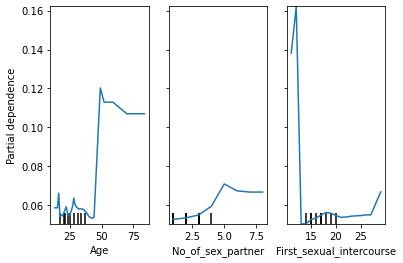

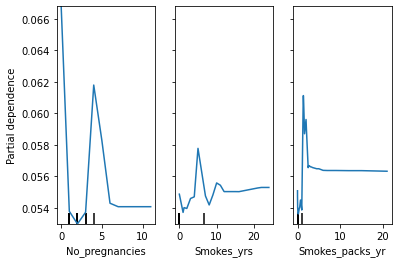

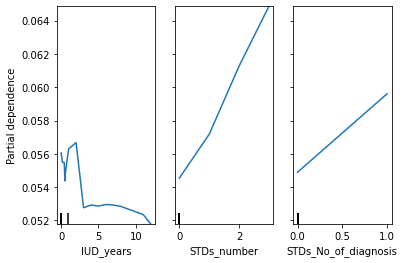

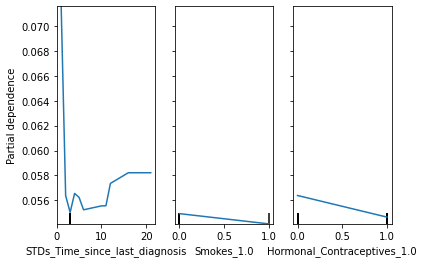

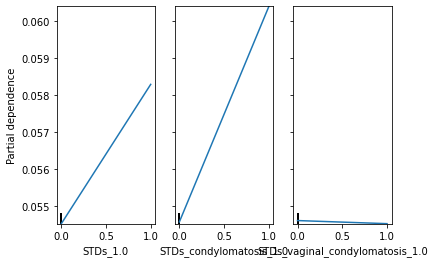

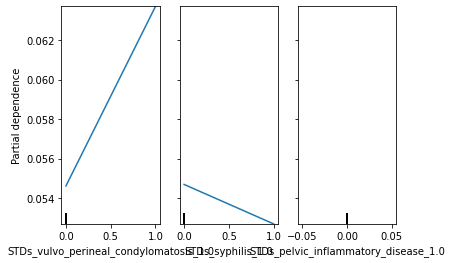

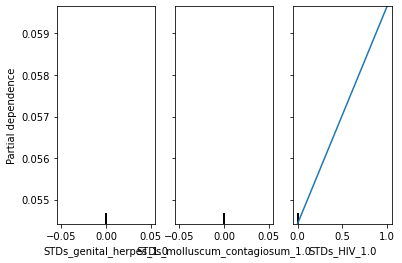

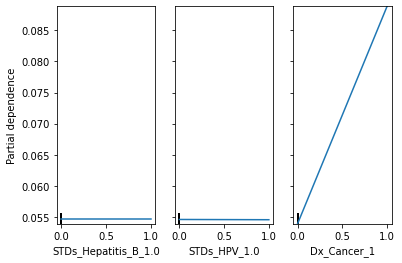

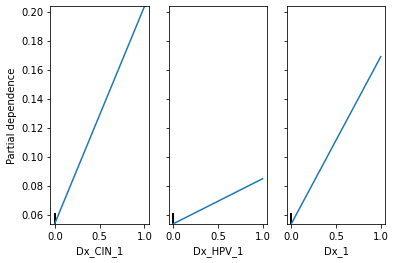

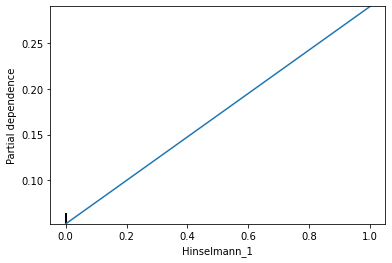

In [ ]:
### Partial dependency plots (PDP) for the test dataset for RF model
# Do PDP for x_test (258 x 33), y_test (258)
# We are using the non-feature engineered RF model

from sklearn.ensemble.partial_dependence import partial_dependence, plot_partial_dependence
from sklearn.inspection import plot_partial_dependence

plt.figure(figsize=(50,70))
plot_partial_dependence(best_grid, x_test, range(3)) 
plot_partial_dependence(best_grid, x_test, range(3,6))
plot_partial_dependence(best_grid, x_test, range(7,10))
plot_partial_dependence(best_grid, x_test, range(11,14))
plot_partial_dependence(best_grid, x_test, range(15,18))
plot_partial_dependence(best_grid, x_test, range(18,21))
plot_partial_dependence(best_grid, x_test, range(21,24))
plot_partial_dependence(best_grid, x_test, range(24,27))
plot_partial_dependence(best_grid, x_test, range(27,30))
plot_partial_dependence(best_grid, x_test, range(30,31))

These graphs may seem surprising at first. We can observe at first many of these are flat lines or even non-existent, including many of the binary variables predicting various STDs, such as pelvic inflammatory disease or genital herpes. We can infer that these are bad predictors of presence of cervical cancer. 

In all of these graphs, the tick marks on the x-axis represent the deciles of the feature values in the test data (https://scikit-learn.org/stable/auto_examples/inspection/plot_partial_dependence.html).

There is a lot to unpack here, so let's go graph by graph. As expected, the relationship between age and presence of cervical cancer spikes dramatically around age 50. Most observations are below age 50 (there are only 4 observations above age 50 in the training set). Dependence increases exponentially from 0 to 5 sexual partners then plateaus past 5. Dependence for first sexual intercourse sadly spikes around a very young age (age 10).

Dependence on number of pregnancies is more erratic, spiking around 0 and 4 pregnancies. Years smoked spikes around 5 years, and number of packs smoked per year spikes around 3. However, if you look at the scale of the y-axis and the absolute values of partial dependence for these 3 variables, they're almost an entire magnitude smaller than the first three variables: age, number of sexual partners, and first sexual intercourse. 

For IUD years, the 3rd quartile is still 0 years but the max is 17 years. The values are right-skewed, so this accounts for the fact that the partial dependence is explained mostly by smaller values. The same trend can be seen for smokes, hormonal contraceptives, ahd IUD (all binary variables).

Most STDs (binary variables) show a positive linear relationship between presence and partial dependence, though some, such as Hepatitis B and HPV, had too few values to furnish a meaningful analysis. For Dx_Cancer, signifying the presence of cancer after the diagnosis, most deciles are near 0.0 but the line is positive sloping from 0.0 to 1.0. This means that though only a few observations had cancer after diagnosis, the presence of a positive outcome of this variable basically guaranteed a biopsy, as it should.

On the whole, it seems like age, number of sexual partners, and age of first sexual intercourse have the strongest association with the presence of cervical cancer, with number of pregnancies and smoking also having a strong effect.





In [ ]:
## Feature Engineering: reducing various condylomatosis diagnoses down to one column

def condylomatosis_conditional(s):
    if (s['STDs_condylomatosis_1.0'] == 1) or (s['STDs_vaginal_condylomatosis_1.0'] == 1) or (s['STDs_vulvo_perineal_condylomatosis_1.0'] == 1):
        return 1
    else:
        return 0

fe_df_full = df_full
fe_df_full['condylomatosis'] = fe_df_full.apply(condylomatosis_conditional, axis=1)
fe_df_full = pd.get_dummies(fe_df_full, columns=['condylomatosis'], drop_first=True) # Converts condylomatosis column to dummies

fe_df_full['condylomatosis_1'].value_counts()
fe_df_full.head()

,Age,No_of_sex_partner,First_sexual_intercourse,No_pregnancies,Smokes_yrs,Smokes_packs_yr,Hormonal_Contraceptives_years,IUD_years,STDs_number,STDs_No_of_diagnosis,STD_Time_since_first_diagnosis,STDs_Time_since_last_diagnosis,Biopsy,Smokes_1.0,Hormonal_Contraceptives_1.0,IUD_1.0,STDs_1.0,STDs_condylomatosis_1.0,STDs_vaginal_condylomatosis_1.0,STDs_vulvo_perineal_condylomatosis_1.0,STDs_syphilis_1.0,STDs_pelvic_inflammatory_disease_1.0,STDs_genital_herpes_1.0,STDs_molluscum_contagiosum_1.0,STDs_HIV_1.0,STDs_Hepatitis_B_1.0,STDs_HPV_1.0,Dx_Cancer_1,Dx_CIN_1,Dx_HPV_1,Dx_1,Hinselmann_1,Schiller_1,Citology_1,condylomatosis_1
0,18,4.00000,15.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0,4.00000,3.00000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,15,1.00000,14.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0,4.00000,3.00000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,34,1.00000,17.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0,4.00000,3.00000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,52,5.00000,16.00000,4.00000,37.00000,37.00000,3.00000,0.00000,0.00000,0,4.00000,3.00000,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
4,46,3.00000,21.00000,4.00000,0.00000,0.00000,15.00000,0.00000,0.00000,0,4.00000,3.00000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
fe_df_full.shape

(858, 35)

In [ ]:
# Creating the same random split for feature engineered dataset as done with original dataset using train_test_split()
fe_x = fe_df_full.loc[:, fe_df_full.columns != 'Biopsy']
fe_y = fe_df_full.loc[:, 'Biopsy']

print(x.shape)
print(y.shape)

fe_x_train, fe_x_test, fe_y_train, fe_y_test = train_test_split(fe_x, fe_y, test_size=0.3, random_state=42)

print(fe_x_train.shape)
print(fe_x_test.shape)
print(fe_y_train.shape)
print(fe_y_test.shape)
fe_x_train.head()

(858, 33)
(858,)
(600, 34)
(258, 34)
(600,)
(258,)


,Age,No_of_sex_partner,First_sexual_intercourse,No_pregnancies,Smokes_yrs,Smokes_packs_yr,Hormonal_Contraceptives_years,IUD_years,STDs_number,STDs_No_of_diagnosis,STD_Time_since_first_diagnosis,STDs_Time_since_last_diagnosis,Smokes_1.0,Hormonal_Contraceptives_1.0,IUD_1.0,STDs_1.0,STDs_condylomatosis_1.0,STDs_vaginal_condylomatosis_1.0,STDs_vulvo_perineal_condylomatosis_1.0,STDs_syphilis_1.0,STDs_pelvic_inflammatory_disease_1.0,STDs_genital_herpes_1.0,STDs_molluscum_contagiosum_1.0,STDs_HIV_1.0,STDs_Hepatitis_B_1.0,STDs_HPV_1.0,Dx_Cancer_1,Dx_CIN_1,Dx_HPV_1,Dx_1,Hinselmann_1,Schiller_1,Citology_1,condylomatosis_1
28,37,3.00000,24.00000,1.00000,3.00000,0.04000,0.00000,0.00000,0.00000,0,4.00000,3.00000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
457,15,3.00000,14.00000,1.00000,1.26697,0.51320,0.50000,0.00000,0.00000,0,4.00000,3.00000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
193,26,10.00000,16.00000,1.00000,9.00000,0.51320,0.50000,0.00000,0.00000,0,4.00000,3.00000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
367,19,1.00000,19.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0,4.00000,3.00000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
467,16,28.00000,10.00000,1.00000,5.00000,5.00000,0.00000,0.00000,0.00000,0,4.00000,3.00000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# checking train/test split values before and after feature engineering
print(x_train['STDs_condylomatosis_1.0'].value_counts(), x_train['STDs_vaginal_condylomatosis_1.0'].value_counts(), x_train['STDs_vulvo_perineal_condylomatosis_1.0'].value_counts())
print(fe_x_train['STDs_condylomatosis_1.0'].value_counts(), fe_x_train['STDs_vaginal_condylomatosis_1.0'].value_counts(), fe_x_train['STDs_vulvo_perineal_condylomatosis_1.0'].value_counts())

print(x_test['STDs_condylomatosis_1.0'].value_counts(), x_test['STDs_vaginal_condylomatosis_1.0'].value_counts(), x_test['STDs_vulvo_perineal_condylomatosis_1.0'].value_counts())
print(fe_x_test['STDs_condylomatosis_1.0'].value_counts(), fe_x_test['STDs_vaginal_condylomatosis_1.0'].value_counts(), fe_x_test['STDs_vulvo_perineal_condylomatosis_1.0'].value_counts())

# dropping unneeded features from the feature engineered train and test data
fe_x_train = fe_x_train.drop(['STDs_condylomatosis_1.0', 'STDs_vaginal_condylomatosis_1.0', 'STDs_vulvo_perineal_condylomatosis_1.0'], axis=1)
fe_x_test = fe_x_test.drop(['STDs_condylomatosis_1.0', 'STDs_vaginal_condylomatosis_1.0', 'STDs_vulvo_perineal_condylomatosis_1.0'], axis=1)

print(fe_x_train.shape)
print(fe_x_test.shape)
fe_x_train.head()

0    566
1     34
Name: STDs_condylomatosis_1.0, dtype: int64 0    597
1      3
Name: STDs_vaginal_condylomatosis_1.0, dtype: int64 0    567
1     33
Name: STDs_vulvo_perineal_condylomatosis_1.0, dtype: int64
0    566
1     34
Name: STDs_condylomatosis_1.0, dtype: int64 0    597
1      3
Name: STDs_vaginal_condylomatosis_1.0, dtype: int64 0    567
1     33
Name: STDs_vulvo_perineal_condylomatosis_1.0, dtype: int64
0    248
1     10
Name: STDs_condylomatosis_1.0, dtype: int64 0    257
1      1
Name: STDs_vaginal_condylomatosis_1.0, dtype: int64 0    248
1     10
Name: STDs_vulvo_perineal_condylomatosis_1.0, dtype: int64
0    248
1     10
Name: STDs_condylomatosis_1.0, dtype: int64 0    257
1      1
Name: STDs_vaginal_condylomatosis_1.0, dtype: int64 0    248
1     10
Name: STDs_vulvo_perineal_condylomatosis_1.0, dtype: int64
(600, 31)
(258, 31)


,Age,No_of_sex_partner,First_sexual_intercourse,No_pregnancies,Smokes_yrs,Smokes_packs_yr,Hormonal_Contraceptives_years,IUD_years,STDs_number,STDs_No_of_diagnosis,STD_Time_since_first_diagnosis,STDs_Time_since_last_diagnosis,Smokes_1.0,Hormonal_Contraceptives_1.0,IUD_1.0,STDs_1.0,STDs_syphilis_1.0,STDs_pelvic_inflammatory_disease_1.0,STDs_genital_herpes_1.0,STDs_molluscum_contagiosum_1.0,STDs_HIV_1.0,STDs_Hepatitis_B_1.0,STDs_HPV_1.0,Dx_Cancer_1,Dx_CIN_1,Dx_HPV_1,Dx_1,Hinselmann_1,Schiller_1,Citology_1,condylomatosis_1
28,37,3.00000,24.00000,1.00000,3.00000,0.04000,0.00000,0.00000,0.00000,0,4.00000,3.00000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
457,15,3.00000,14.00000,1.00000,1.26697,0.51320,0.50000,0.00000,0.00000,0,4.00000,3.00000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
193,26,10.00000,16.00000,1.00000,9.00000,0.51320,0.50000,0.00000,0.00000,0,4.00000,3.00000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
367,19,1.00000,19.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0,4.00000,3.00000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
467,16,28.00000,10.00000,1.00000,5.00000,5.00000,0.00000,0.00000,0.00000,0,4.00000,3.00000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Feature engineered - Logistic Regression model: This model utilizes all predictors to predict biopsy
# fitting the Logistic Regression Model on the train dataset

logreg_model = LogisticRegression(penalty='none', max_iter = 10000)
logreg_model.fit(fe_x_train, fe_y_train)
print(logreg_model)

#calculating ROC and AUC of the Logistic Regression Model on the test dataset
proba_outcome = logreg_model.predict_proba(fe_x_test)
print(roc_auc_score(fe_y_test, proba_outcome[:,1]))

# Using bootstrapping to get AUC confidence intervals

y_true = np.array(fe_y_test)
y_pred = np.array(proba_outcome[:,1])

n_bootstraps = 1000
rng_seed = 42  # control reproducibility
bootstrapped_scores = []

rng = np.random.RandomState(rng_seed)
for i in range(n_bootstraps):
    indices = rng.randint(0, len(y_pred), len(y_pred))
    if len(np.unique(y_true[indices])) < 2:
        continue

    score = roc_auc_score(y_true[indices], y_pred[indices])
    bootstrapped_scores.append(score)
    
sorted_scores = np.array(bootstrapped_scores)
sorted_scores.sort()

confidence_lower = sorted_scores[int(0.05 * len(sorted_scores))]
confidence_upper = sorted_scores[int(0.95 * len(sorted_scores))]
print("Confidence interval for the score: [{:0.3f} - {:0.3}]".format(confidence_lower, confidence_upper))


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
0.8795610425240055
Confidence interval for the score: [0.752 - 0.978]


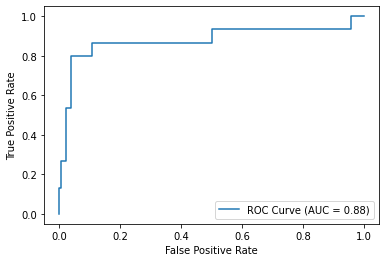

In [ ]:
#Create ROC Curve
fpr, tpr, thresholds = metrics.roc_curve(y_true, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC Curve')
display.plot()  
plt.show()   

So in summary, the feature engineered version of logistic regression doesn't change the model AUC at all - still at 0.8798. This suggests the base logistic regression model already had fairly high predictive power!

In [ ]:
# Feature engineered - Ridge Regression model: This model utilizes all predictors to predict biopsy in a logistic regression framework with regularization on the L2 term.
# A 5 fold cross validation was used to build the parameters for the model.
# fitting the Logistic Regression Model on the train dataset
ridge_model = LogisticRegressionCV(cv=5, penalty='l2', max_iter = 10000)
ridge_model.fit(fe_x_train, fe_y_train)
print(ridge_model)

#calculating ROC and AUC of the Logistic Regression Model on the test dataset
ridgeproba_outcome = ridge_model.predict_proba(fe_x_test)
print(roc_auc_score(fe_y_test, ridgeproba_outcome[:,1]))

# Using bootstraping to get AUC confidence intervals

y_true = np.array(fe_y_test)
y_pred = np.array(ridgeproba_outcome[:,1])

n_bootstraps = 1000
rng_seed = 42  # control reproducibility
bootstrapped_scores = []

rng = np.random.RandomState(rng_seed)
for i in range(n_bootstraps):
    indices = rng.randint(0, len(y_pred), len(y_pred))
    if len(np.unique(y_true[indices])) < 2:
        continue

    score = roc_auc_score(y_true[indices], y_pred[indices])
    bootstrapped_scores.append(score)
    
sorted_scores = np.array(bootstrapped_scores)
sorted_scores.sort()

confidence_lower = sorted_scores[int(0.05 * len(sorted_scores))]
confidence_upper = sorted_scores[int(0.95 * len(sorted_scores))]
print("Confidence interval for the score: [{:0.3f} - {:0.3}]".format(confidence_lower, confidence_upper))

LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=10000, multi_class='auto', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)
0.8790123456790122
Confidence interval for the score: [0.751 - 0.978]


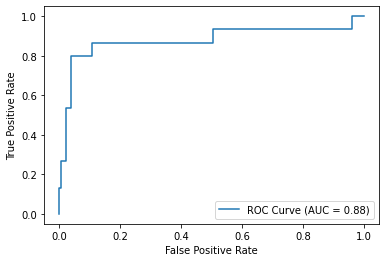

In [ ]:
#Create ROC Curve
fpr, tpr, thresholds = metrics.roc_curve(y_true, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC Curve')
display.plot()  
plt.show()   

In [ ]:
## Feature engineered - Random Forest
param_grid = {'n_estimators': [100, 250, 500, 750, 1000], 'max_features': [4,6,8], 'random_state': [21]}

rf = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rf, param_grid=param_grid, cv=5)

rf_model_fe = grid_search.fit(fe_x_train, fe_y_train)
best_grid = grid_search.best_estimator_

print(rf_model_fe)
print(grid_search.best_params_, grid_search.best_score_)

#calculating ROC and AUC of the Logistic Regression Model on the test dataset
rf_proba_outcome = best_grid.predict_proba(fe_x_test)
print(roc_auc_score(fe_y_test, rf_proba_outcome[:,1]))

# Using bootstraping to get AUC confidence intervals

y_true = np.array(fe_y_test)
y_pred = np.array(rf_proba_outcome[:,1])

n_bootstraps = 1000
rng_seed = 42  # control reproducibility
bootstrapped_scores = []

rng = np.random.RandomState(rng_seed)
for i in range(n_bootstraps):
    indices = rng.randint(0, len(y_pred), len(y_pred))
    if len(np.unique(y_true[indices])) < 2:
        continue

    score = roc_auc_score(y_true[indices], y_pred[indices])
    bootstrapped_scores.append(score)
    
sorted_scores = np.array(bootstrapped_scores)
sorted_scores.sort()

confidence_lower = sorted_scores[int(0.05 * len(sorted_scores))]
confidence_upper = sorted_scores[int(0.95 * len(sorted_scores))]
print("Confidence interval for the score: [{:0.3f} - {:0.3}]".format(confidence_lower, confidence_upper))

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

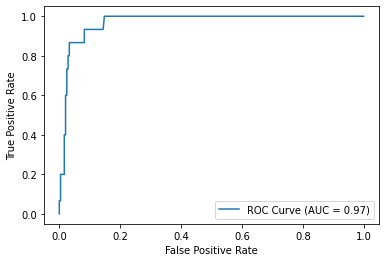

In [ ]:
#Create ROC Curve
fpr, tpr, thresholds = metrics.roc_curve(y_true, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC Curve')
display.plot()  
plt.show()   